Using the new data which the countries with no visitors coming to Istanbul we will calculate the chi-square test of independence.
But firstly we are going to change the "ziyaretci_sayisi" column to Visitors for better understanding.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("filtered_merged_output.csv")
df.rename(columns={ "ziyaretci_sayisi": "Visitors"},inplace= True)
df.head()

,Date,Country,Country_Temp,Country_Humidity,Country_Precipitation,Avg Temperature (C),Avg Humidity (%),Total Precipitation (mm),Visitors,Income classification
0,2019-01-01,AUS,28.13,43.30,205.00,8.475422,70.202765,77.666667,4087.0,High Income
1,2019-04-01,AUS,23.09,46.53,92.80,18.119355,66.005735,28.066667,17511.0,High Income
2,2020-01-01,AUS,28.43,43.21,211.97,8.450130,69.750463,85.466667,1746.0,High Income
3,2020-04-01,AUS,23.15,47.01,98.12,16.768459,62.811470,64.100000,221.0,High Income
4,2022-01-01,AUS,28.25,43.20,211.61,6.649386,69.688172,73.133333,8848.0,High Income


#chi square test of indepence

In [ ]:
#chi square test of indepence

Machine Learning

Before developing a machine learning model, we need to add the yoy_inflation.csv to our data. But first we need to convert it from monthly yoy inflation to seasonal. We will use the mean of the data.

In [19]:
import pandas as pd

# Load your data
df = pd.read_csv("yoy_inflation.csv", parse_dates=["Month"])
df = df.sort_values("Month").reset_index(drop=True)

# Divide the time into quarters
df["Quarter"] = df.index // 3

# Group dates so the first month will be the season indicator , so it will be the same format as our data.
group_starts = df.groupby("Quarter")["Month"].first()
df["Date"] = df["Quarter"].map(group_starts)

#Take the mean value of the season and group them to the first month
Seasonal_yoy_inflation = df.groupby("Date")["YoY_Inflation (%)"].mean().reset_index()

# format the - so the it will be the same format as our filtered_merged_output
Seasonal_yoy_inflation["Date"] = Seasonal_yoy_inflation["Date"].dt.strftime("%Y-%m-%d")

#save as a seperate csv file
Seasonal_yoy_inflation.to_csv("Seasonal_yoy_inflation.csv",index=False)

#Load our main dataset and the dataset we saved
inflation_df = pd.read_csv("Seasonal_yoy_inflation.csv", parse_dates=["Date"])
main_df = pd.read_csv("filtered_merged_output.csv", parse_dates=["Date"])
merged = pd.merge(main_df, inflation_df, on="Date", how="left")
merged.to_csv("filtered_merged_with_inflation.csv", index=False)

merged.head()



,Date,Country,Country_Temp,Country_Humidity,Country_Precipitation,Avg Temperature (C),Avg Humidity (%),Total Precipitation (mm),Visitors,Income classification,YoY_Inflation (%)
0,2019-01-01,AUS,28.13,43.30,205.00,8.475422,70.202765,77.666667,4087.0,High Income,16.824771
1,2019-04-01,AUS,23.09,46.53,92.80,18.119355,66.005735,28.066667,17511.0,High Income,15.438512
2,2020-01-01,AUS,28.43,43.21,211.97,8.450130,69.750463,85.466667,1746.0,High Income,12.348299
3,2020-04-01,AUS,23.15,47.01,98.12,16.768459,62.811470,64.100000,221.0,High Income,12.223215
4,2022-01-01,AUS,28.25,43.20,211.61,6.649386,69.688172,73.133333,8848.0,High Income,48.615445


Now that we have everything ready. We need to decide what are predicators and estimators. Our model is going to to give us the number of tourists coming to istanbul from a country. So our predictors should be remaining columns. But first let check multicolinerity.

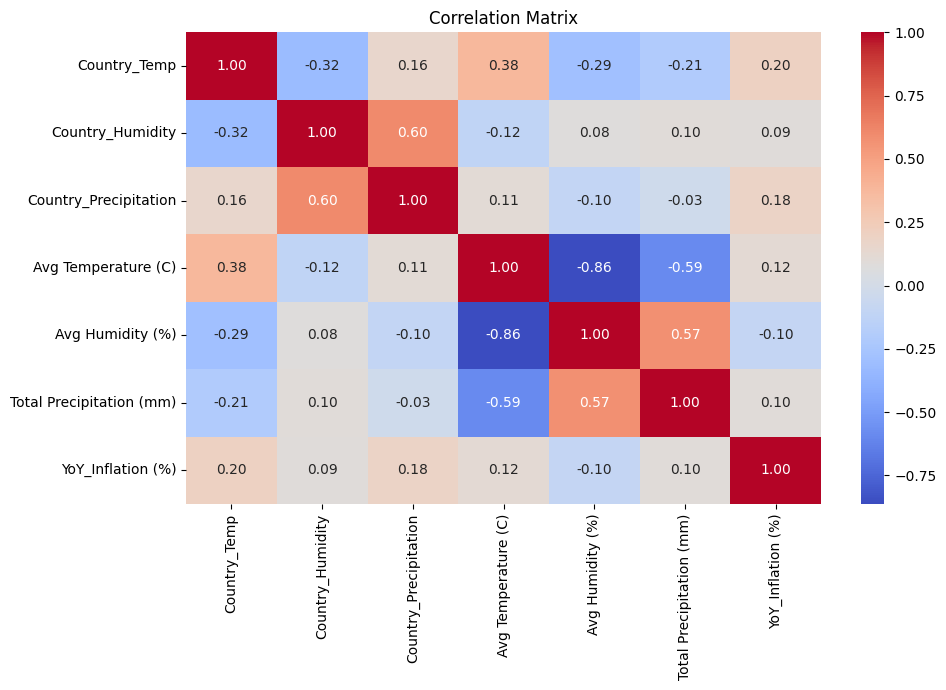


🔍 Variance Inflation Factor (VIF) Scores:
                    Feature          VIF
0                     const  1282.178385
4       Avg Temperature (C)     4.411763
5          Avg Humidity (%)     4.024948
2          Country_Humidity     2.186522
3     Country_Precipitation     2.005954
6  Total Precipitation (mm)     1.638862
1              Country_Temp     1.607103
7         YoY_Inflation (%)     1.123432


In [ ]:

import matplotlib.pyplot as plt
import statsmodels.api as statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import seaborn as sns
from statsmodels.tools.tools import add_constant


df = pd.read_csv("filtered_merged_with_inflation.csv", parse_dates=["Date"])

predictors = [
    "Country_Temp",
    "Country_Humidity",
    "Country_Precipitation",
    "Avg Temperature (C)",
    "Avg Humidity (%)",
    "Total Precipitation (mm)",
    "YoY_Inflation (%)"
]

X = df[predictors]

plt.figure(figsize=(10, 7))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

X_const = add_constant(X) 

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\n🔍 Variance Inflation Factor (VIF) Scores:")
print(vif_data.sort_values(by="VIF", ascending=False))


There is no multicolinerity between variables.